# **1. Data Preprocessing**
- [Dataset Download](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

## 1-1. 데이터 확인

우선, kaggle에서 제공하는 데이터셋을 다운받습니다.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')

print('총 데이터 수 :',len(data))

총 데이터 수 : 5572


우선 데이터 확인을 위해 기존 데이터에서 **상위 10개**만 추출하여 확인해봅니다.

In [3]:
data[:10]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


## 1-2.불필요한 열 제거


불필요한 열 : `Unnamed: n`

위 3개의 열은 텍스트 분류를 진행하기엔 불필요한 열입니다.

위 3개의 열을 삭제하고 2개의 열(`v1`,`v2`)를 (`category`, `text`)로 변경합니다.



In [4]:
data = data[data.columns[:2]] # 두열만 가져온다. 
data.columns = ['category', 'text'] 

In [5]:
data

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


해당 데이터의 정보 확인

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


`null`값 확인

In [7]:
data.isnull().values.any()

False

중복 데이터 확인

In [8]:
data['text'].nunique(), data['category'].nunique()

(5169, 2)

In [9]:
df = pd.DataFrame(data)
duplicatedDF = df[df.duplicated()]
print(duplicatedDF)

     category                                               text
102       ham  As per your request 'Melle Melle (Oru Minnamin...
153       ham  As per your request 'Melle Melle (Oru Minnamin...
206       ham  As I entered my cabin my PA said, '' Happy B'd...
222       ham                             Sorry, I'll call later
325       ham                   No calls..messages..missed calls
...       ...                                                ...
5524     spam  You are awarded a SiPix Digital Camera! call 0...
5535      ham  I know you are thinkin malaria. But relax, chi...
5539      ham                         Just sleeping..and surfing
5553      ham                        Hahaha..use your brain dear
5558      ham                             Sorry, I'll call later

[403 rows x 2 columns]


5,572개 중  `403`개의 중복 데이터가 존재한다는 것을 확인하였습니다.

In [10]:
data.drop_duplicates(subset=['text'], inplace=True) 

In [11]:
df = pd.DataFrame(data)
print(df)  # 출력 DataFrame

     category                                               text
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5169 rows x 2 columns]


## 1-3. 시각화) 메세지 길이 분포

우선 `groupby`를 이용하여 기본적인 갯수나 빈도수를 확인하였습니다.

In [12]:
data.groupby('category').describe()

text                                                               
         count unique                                                top freq
category                                                                     
ham       4516   4516  Go until jurong point, crazy.. Available only ...    1
spam       653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [13]:
data['category_01'] = data.category.map({'ham':0, 'spam':1})

In [14]:
data['text_length'] = data.text.apply(len)

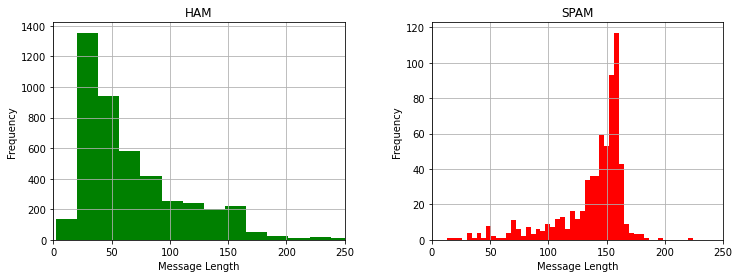

In [22]:
fix, ax = plt.subplots(1,2, figsize=(12,4))

data[data.category=='ham'].hist(column='text_length', bins=50,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Message Length',ylabel = 'Frequency',title = 'HAM', xlim = (0, 250))
data[data.category=='spam'].hist(column='text_length', bins=50,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Message Length',ylabel = 'Frequency',title = 'SPAM', xlim = (0, 250));

메세지의 빈도수를 보게되면 스팸의 메시지는 주로 150글자 정도되며, 스팸이 아닌 일반 메세지는 그보다 적인 50글자 내외가 가장 많음을 확인할 수 있습니다.

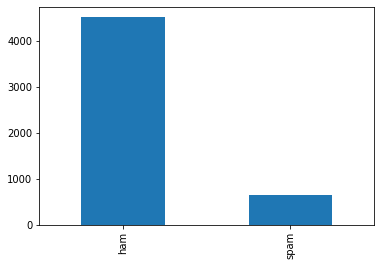

In [24]:
data['category'].value_counts().plot(kind='bar');

스팸보다 일반 메세지의 비율이 가장 많다는 것을 확인할 수 있다.

In [25]:
print(data.groupby('category').size().reset_index(name='count'))

  category  count
0      ham   4516
1     spam    653


## 1-4. WordCloud

In [26]:
X_data = data['text']
y_data = data['category']

In [27]:
import seaborn as sns
import re
import warnings
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk 
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

In [29]:
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline

def displayWordCloud(data = X_data, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

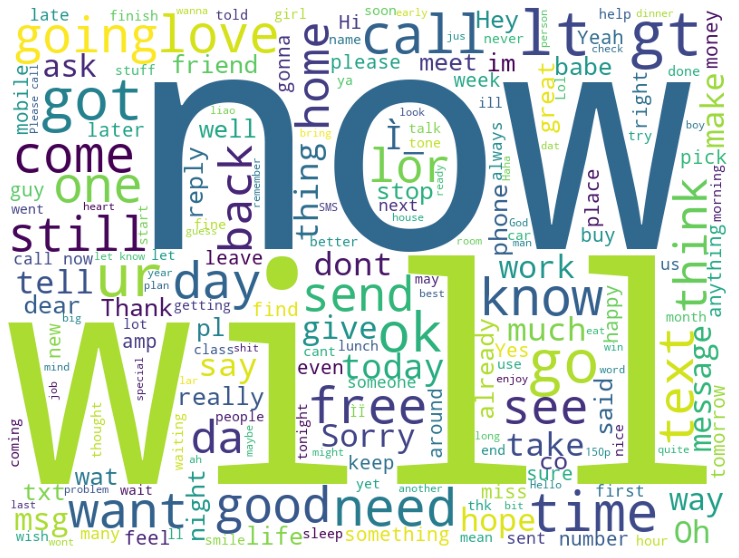

CPU times: user 3.06 s, sys: 115 ms, total: 3.18 s
Wall time: 3.91 s


In [30]:
%time displayWordCloud(''.join(X_data))

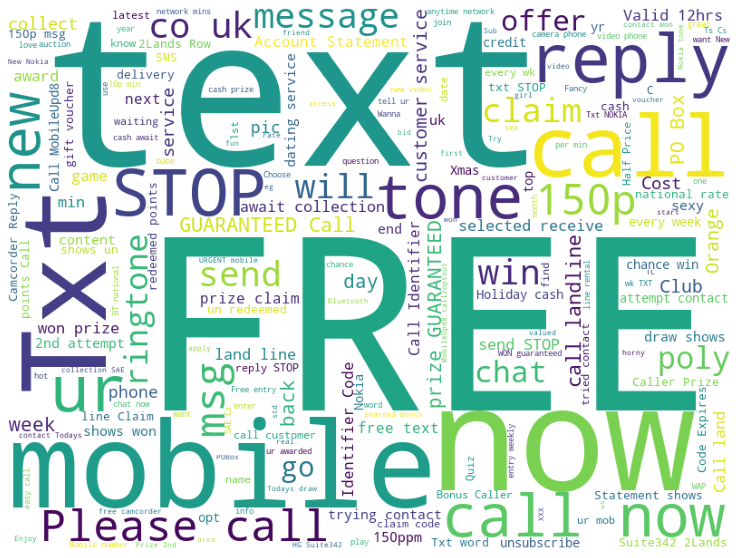

CPU times: user 2.25 s, sys: 78.6 ms, total: 2.32 s
Wall time: 2.38 s


In [33]:
data_spam = data[data['category']== 'spam']

X_spam_data = data_spam['text']
y_spam_data = data_spam['category']

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

%time displayWordCloud(''.join(X_spam_data))

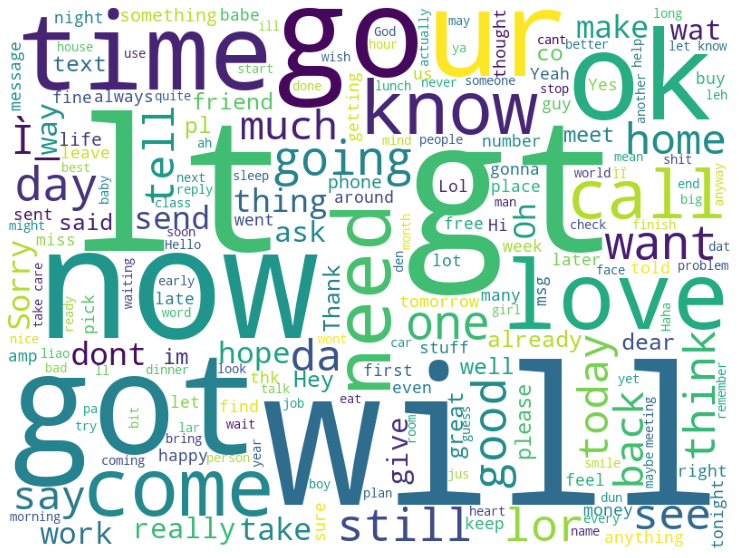

CPU times: user 2.01 s, sys: 84.8 ms, total: 2.1 s
Wall time: 2.1 s


In [36]:
data_ham = data[data['category']== 'ham']

X_hdata = data_ham['text']
y_hdata = data_ham['category']


def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

%time displayWordCloud(''.join(X_hdata))